In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

In [2]:
np.set_printoptions(suppress=True, precision=5)

In [6]:
KatalogPickli="Pickle"

In [76]:
with open("../src/OutDir/odl-1627400825.7058601dtw.pickle", "rb") as plik:
    odl=pickle.load(plik)

In [77]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-skalaOrg.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)

In [78]:
szeregi.shape

(4305, 256)

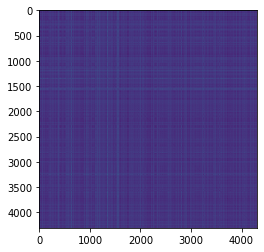

In [79]:
plt.imshow(odl)

# Softdtw

### Wykres silhouette

In [80]:
os.listdir("../src/OutDir")

['1627401450.304716-n_cluster-6-gamma-0.0001.pickle',
 '1627240232.553192-n_cluster-2-gamma-0.001.pickle',
 '1627243419.9636352-n_cluster-4-gamma-0.0141.pickle',
 '1627401593.1109738-n_cluster-4-gamma-0.0001.pickle',
 '1627399605.2035143-n_cluster-2-dtw.pickle',
 '1627240553.9316492-n_cluster-2-gamma-0.0141.pickle',
 '1627241742.0760627-n_cluster-3-gamma-0.0141.pickle',
 '1627401348.8331735-n_cluster-3-gamma-0.0001.pickle',
 '1627401823.3462071-n_cluster-7-gamma-0.0001.pickle',
 '1627241511.0264642-n_cluster-5-gamma-0.001.pickle',
 '1627399646.8112853-n_cluster-3-dtw.pickle',
 '1627241485.5005248-n_cluster-4-gamma-0.001.pickle',
 '1627401975.0319686-n_cluster-5-gamma-0.0001.pickle',
 'odl-1627400825.7058601dtw.pickle',
 '1627241176.9520175-n_cluster-3-gamma-0.001.pickle',
 '1627243668.3268688-n_cluster-5-gamma-0.0141.pickle',
 'odl-1627336556.376963-gamma-0.0141.pickle',
 '1627400848.3745034-n_cluster-2-gamma-0.0001.pickle',
 '1627245002.0377753-n_cluster-7-gamma-0.0141.pickle',
 '1627

In [81]:
reExpr=re.compile(r".*dtw\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [82]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [83]:
listaPasujacych

['1627399605.2035143-n_cluster-2-dtw.pickle',
 '1627399646.8112853-n_cluster-3-dtw.pickle',
 '1627399797.6675856-n_cluster-6-dtw.pickle',
 '1627399671.2783096-n_cluster-4-dtw.pickle',
 '1627399811.202778-n_cluster-7-dtw.pickle',
 '1627399784.2474127-n_cluster-5-dtw.pickle']

In [84]:
listaSilhouetteScore=[]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore.append(ocena)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [85]:
listaSilhouetteScore

[0.3019528968383575,
 0.2202763599364426,
 0.1736281209544648,
 0.17885284927769596,
 0.1622660885503784,
 0.16411300007344704]

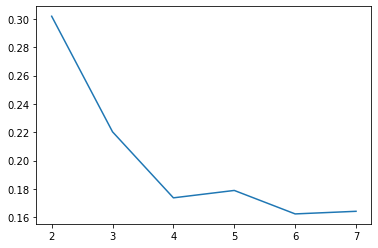

In [86]:
plt.plot(range(2,8), listaSilhouetteScore)

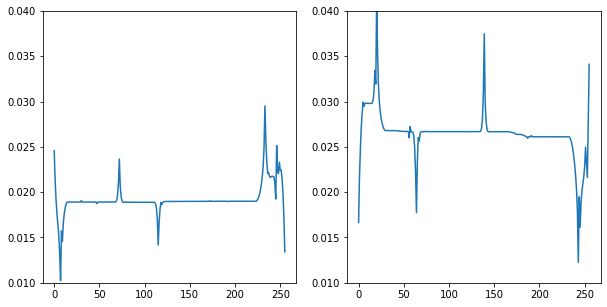

In [90]:
with open(os.path.join("../src/OutDir/",'1627399605.2035143-n_cluster-2-dtw.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(10,5)
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.ylim(0.01, 0.04)
    plt.plot(model.cluster_centers_[i].ravel())

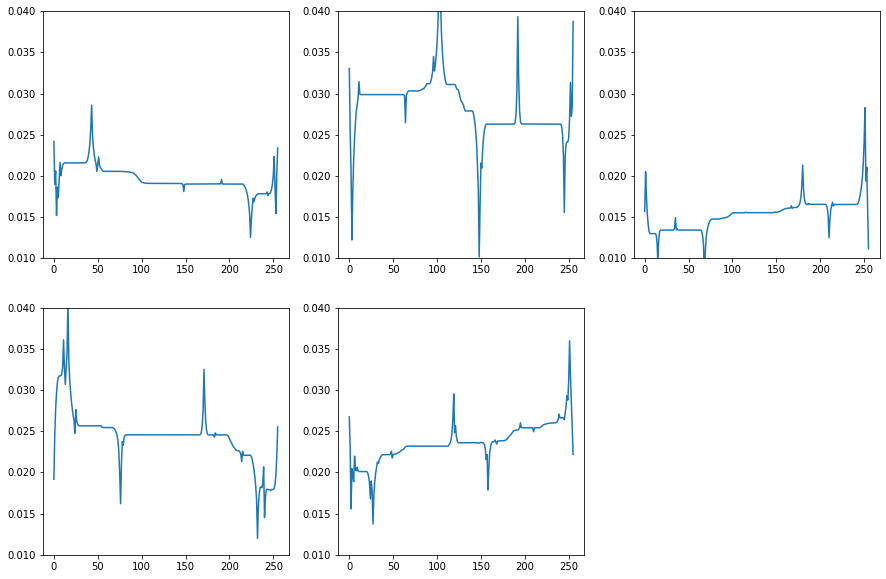

In [91]:
with open(os.path.join("../src/OutDir/",'1627399784.2474127-n_cluster-5-dtw.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.ylim(0.01, 0.04)
    plt.plot(model.cluster_centers_[i].ravel())

In [92]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


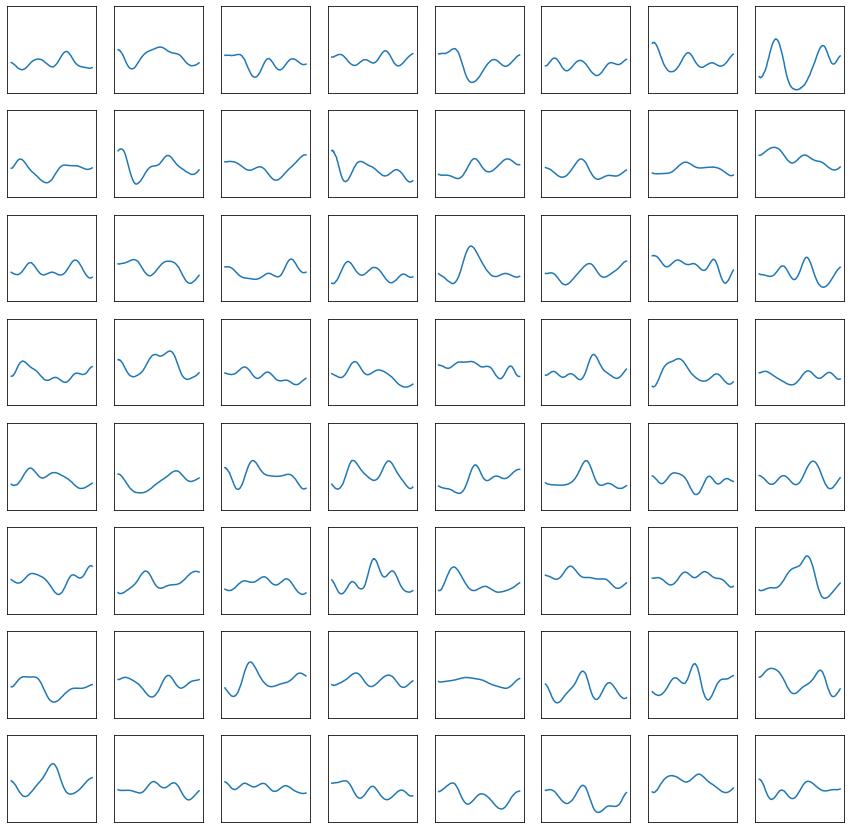

In [104]:
k=0
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

### KMeans 

In [94]:
kmeans=KMeans(5)
predictKMeans=kmeans.fit_predict(szeregi)

In [95]:
np.unique(predictKMeans, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 868,  573,  833, 1227,  804]))

In [96]:
silhouette_score(odl, predictKMeans, metric="precomputed")

0.11054781047279603

In [97]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.26576526721339694,
 0.17018568678140322,
 0.12612066657219076,
 0.1054176635998409,
 0.09293111221622918,
 0.0867782411767061]

### SpectralClustering

In [98]:
spectral=SpectralClustering(5)
predictSpectral=spectral.fit_predict(szeregi)

In [99]:
np.unique(predictSpectral, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 675, 1411,  758,  806,  655]))

In [100]:
silhouette_score(odl, predictSpectral, metric="precomputed")

0.13292264677070825

### Agglomerative Clustering

In [101]:
agglomerative=AgglomerativeClustering(5)
predictAgglomerative=agglomerative.fit_predict(szeregi)

In [102]:
np.unique(predictAgglomerative, return_counts=True)

(array([0, 1, 2, 3, 4]), array([1934,  546,  711,  796,  318]))

In [103]:
silhouette_score(odl, predictAgglomerative, metric="precomputed")

0.07285943049308152